Step 1. You need to make a non-parametric estimation of PDF in form of histogram and using
kernel density function for MRV (or probability law in case of discrete MRV).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_excel("./Absenteeism_at_work_AAA/Absenteeism_at_work.xls", header=None)
data.columns = data.values[0]
data = data.drop(axis=0, index=0)
data.reset_index(inplace=True, drop=True)
selected_features = ['Seasons', 'Son', 'Education', 'Reason for absence', 'Service time', 'Age', 'Absenteeism time in hours', 'Body mass index', 'Distance from Residence to Work']

discrete_feature = [
    True,
    True,
    True,
    True,
    False,
    False,
    False,
    False,
    False,
]

data = data[selected_features]

data['Service time'] = data['Service time'].apply(lambda x: float(x))
data['Age'] = data['Age'].apply(lambda x: float(x))
data['Absenteeism time in hours'] = data['Absenteeism time in hours'].apply(lambda x: float(x))
data['Body mass index'] = data['Body mass index'].apply(lambda x: float(x))
data['Distance from Residence to Work'] = data['Distance from Residence to Work'].apply(lambda x: float(x))
X = data.drop("Absenteeism time in hours", axis=1) #predictors
Y = data["Absenteeism time in hours"] #target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
data.head(10)

,Seasons,Son,Education,Reason for absence,Service time,Age,Absenteeism time in hours,Body mass index,Distance from Residence to Work
0,1,2,1,26,13.0,33.0,4.0,30.0,36.0
1,1,1,1,0,18.0,50.0,0.0,31.0,13.0
2,1,0,1,23,18.0,38.0,2.0,31.0,51.0
3,1,2,1,7,14.0,39.0,4.0,24.0,5.0
4,1,2,1,23,13.0,33.0,2.0,30.0,36.0
5,1,0,1,23,18.0,38.0,2.0,31.0,51.0
6,1,1,1,22,3.0,28.0,8.0,27.0,52.0
7,1,4,1,23,11.0,36.0,4.0,23.0,50.0
8,1,2,1,19,14.0,34.0,40.0,25.0,12.0
9,1,1,3,22,14.0,37.0,8.0,29.0,11.0


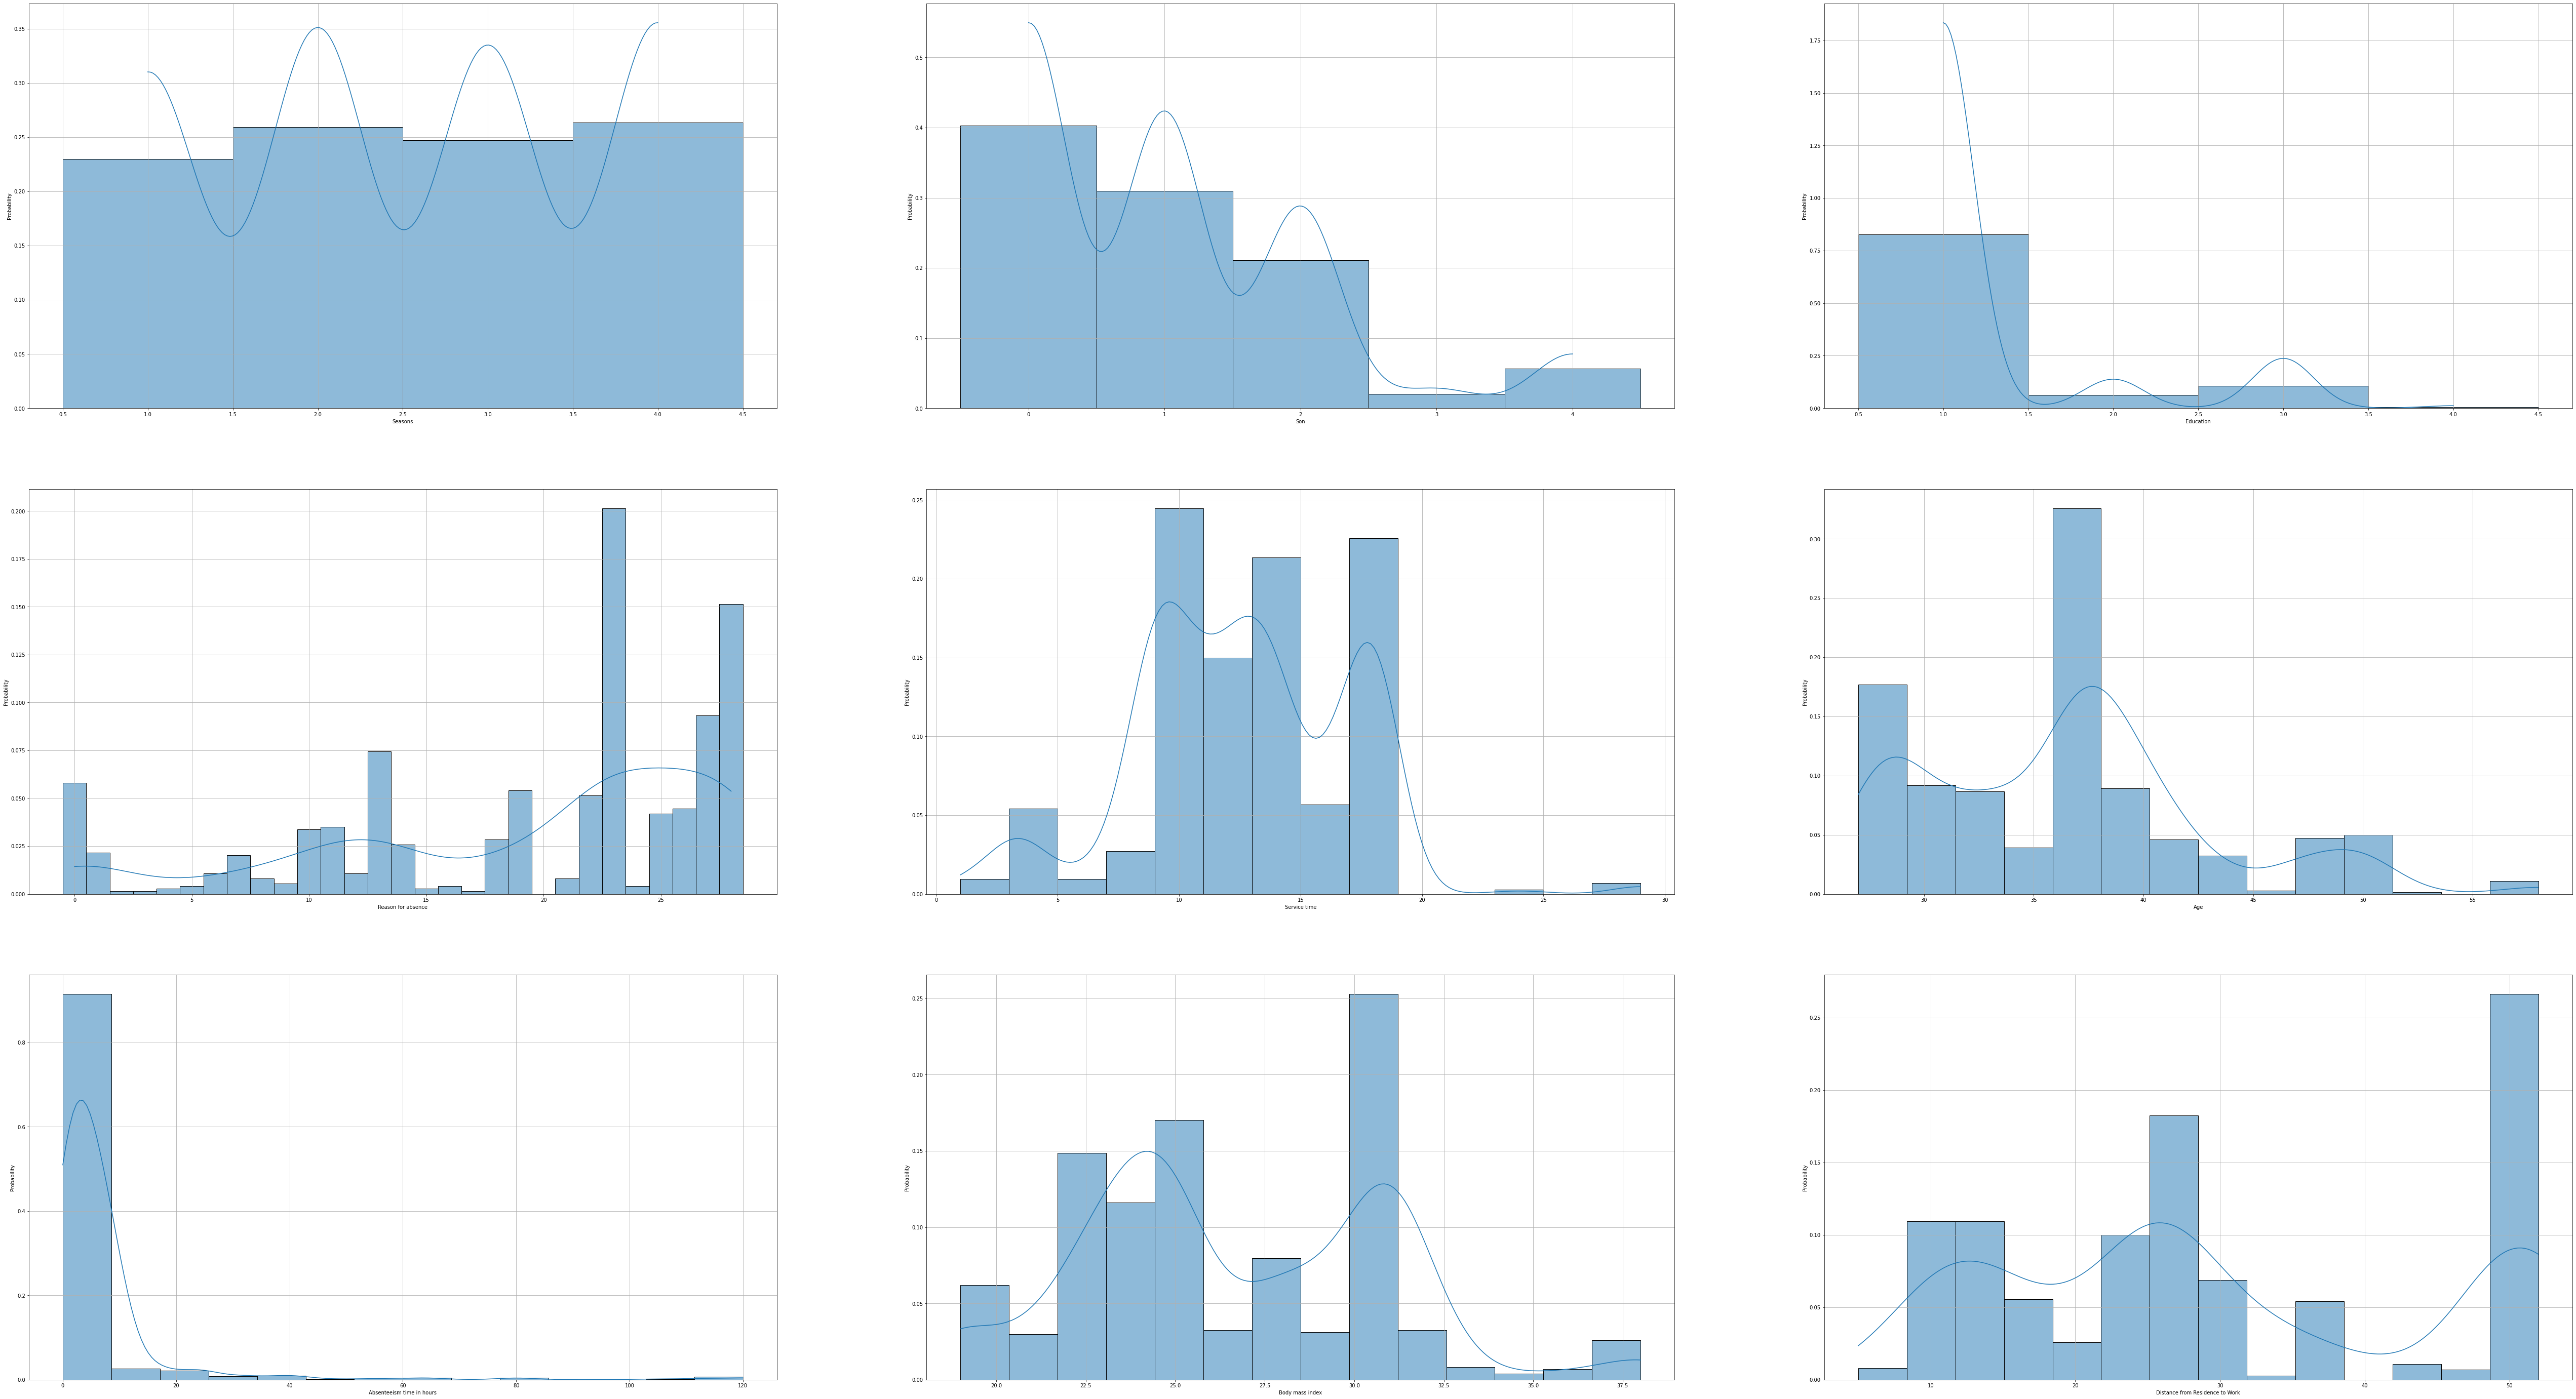

In [3]:
import seaborn as sb
n_bins = int(round(5 * np.log(data.shape[0]) / np.log(10), 0))

fig, ax = plt.subplots(3, len(data.columns) // 3, figsize=(len(data.columns) * 10, 50))
for i, (feature, is_discrete) in enumerate(zip(selected_features, discrete_feature)):
    if not is_discrete:
        bins = n_bins
    else:
        bins = 'auto'
    sb.histplot(data=data[feature], ax=ax[i // 3, i % 3], kde=True, discrete=is_discrete, stat='probability', bins=bins)
    ax[i // 3, i % 3].grid()

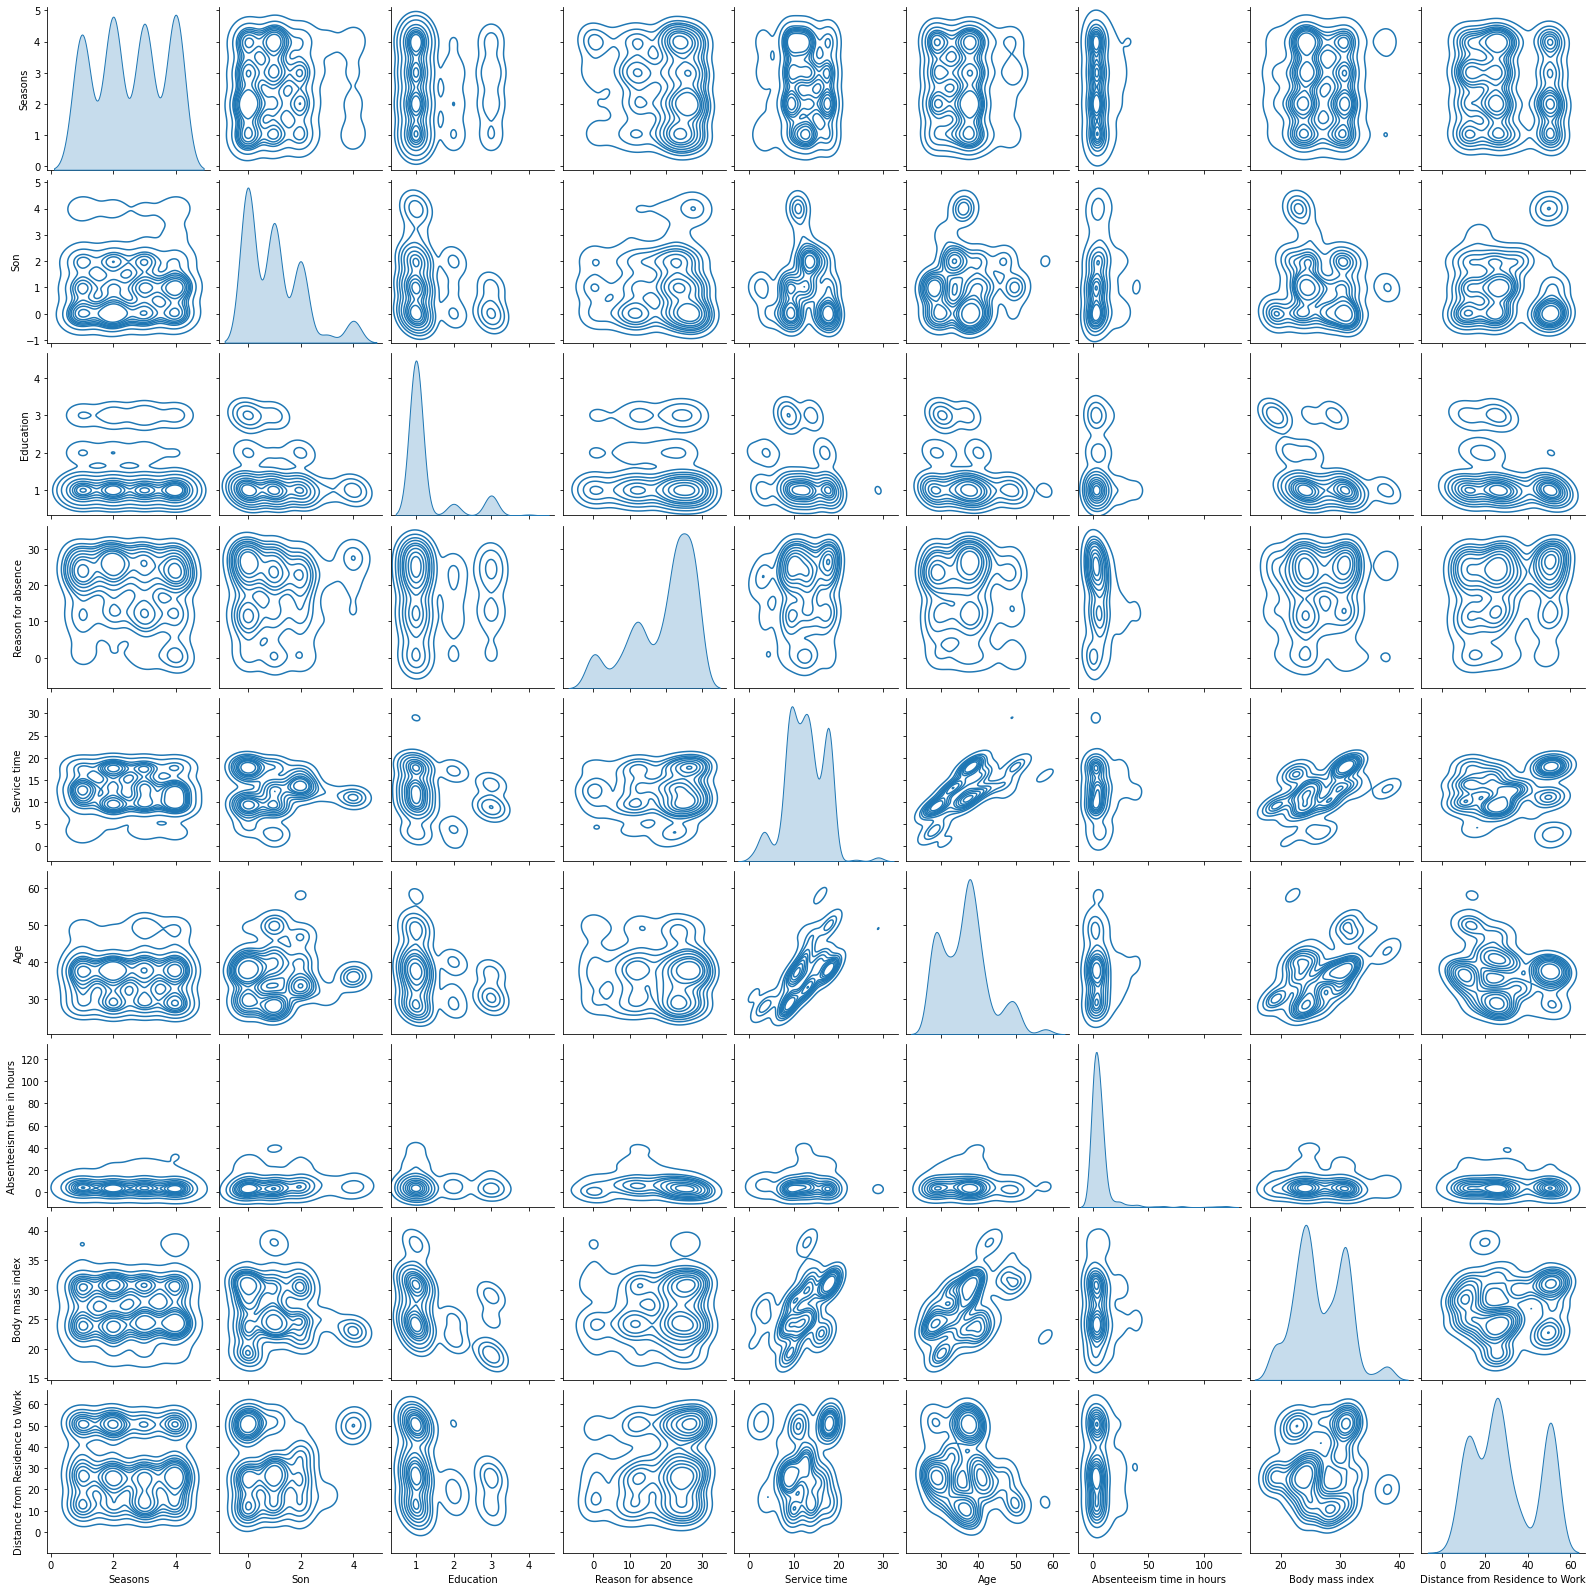

In [4]:
sb.pairplot(data, kind='kde')

Step 2. You need to make an estimation of multivariate mathematical expectation and
variance.

In [5]:
print("Mathematical expectation:\n", data.mean())
print("Variance:\n", data.var())

Mathematical expectation:
 Seasons                             2.544595
Son                                 1.018919
Education                           1.291892
Reason for absence                 19.216216
Service time                       12.554054
Age                                36.450000
Absenteeism time in hours           6.924324
Body mass index                    26.677027
Distance from Residence to Work    29.631081
dtype: float64
Variance:
 Seasons                              1.236168
Son                                  1.206678
Education                            0.453249
Reason for absence                  71.122335
Service time                        19.227115
Age                                 41.974493
Absenteeism time in hours          177.715510
Body mass index                     18.365101
Distance from Residence to Work    220.130291
dtype: float64


Step 3. You need to make a non-parametric estimation of conditional distributions,
mathematical expectations and variances. TODO: Add more conditional expectations

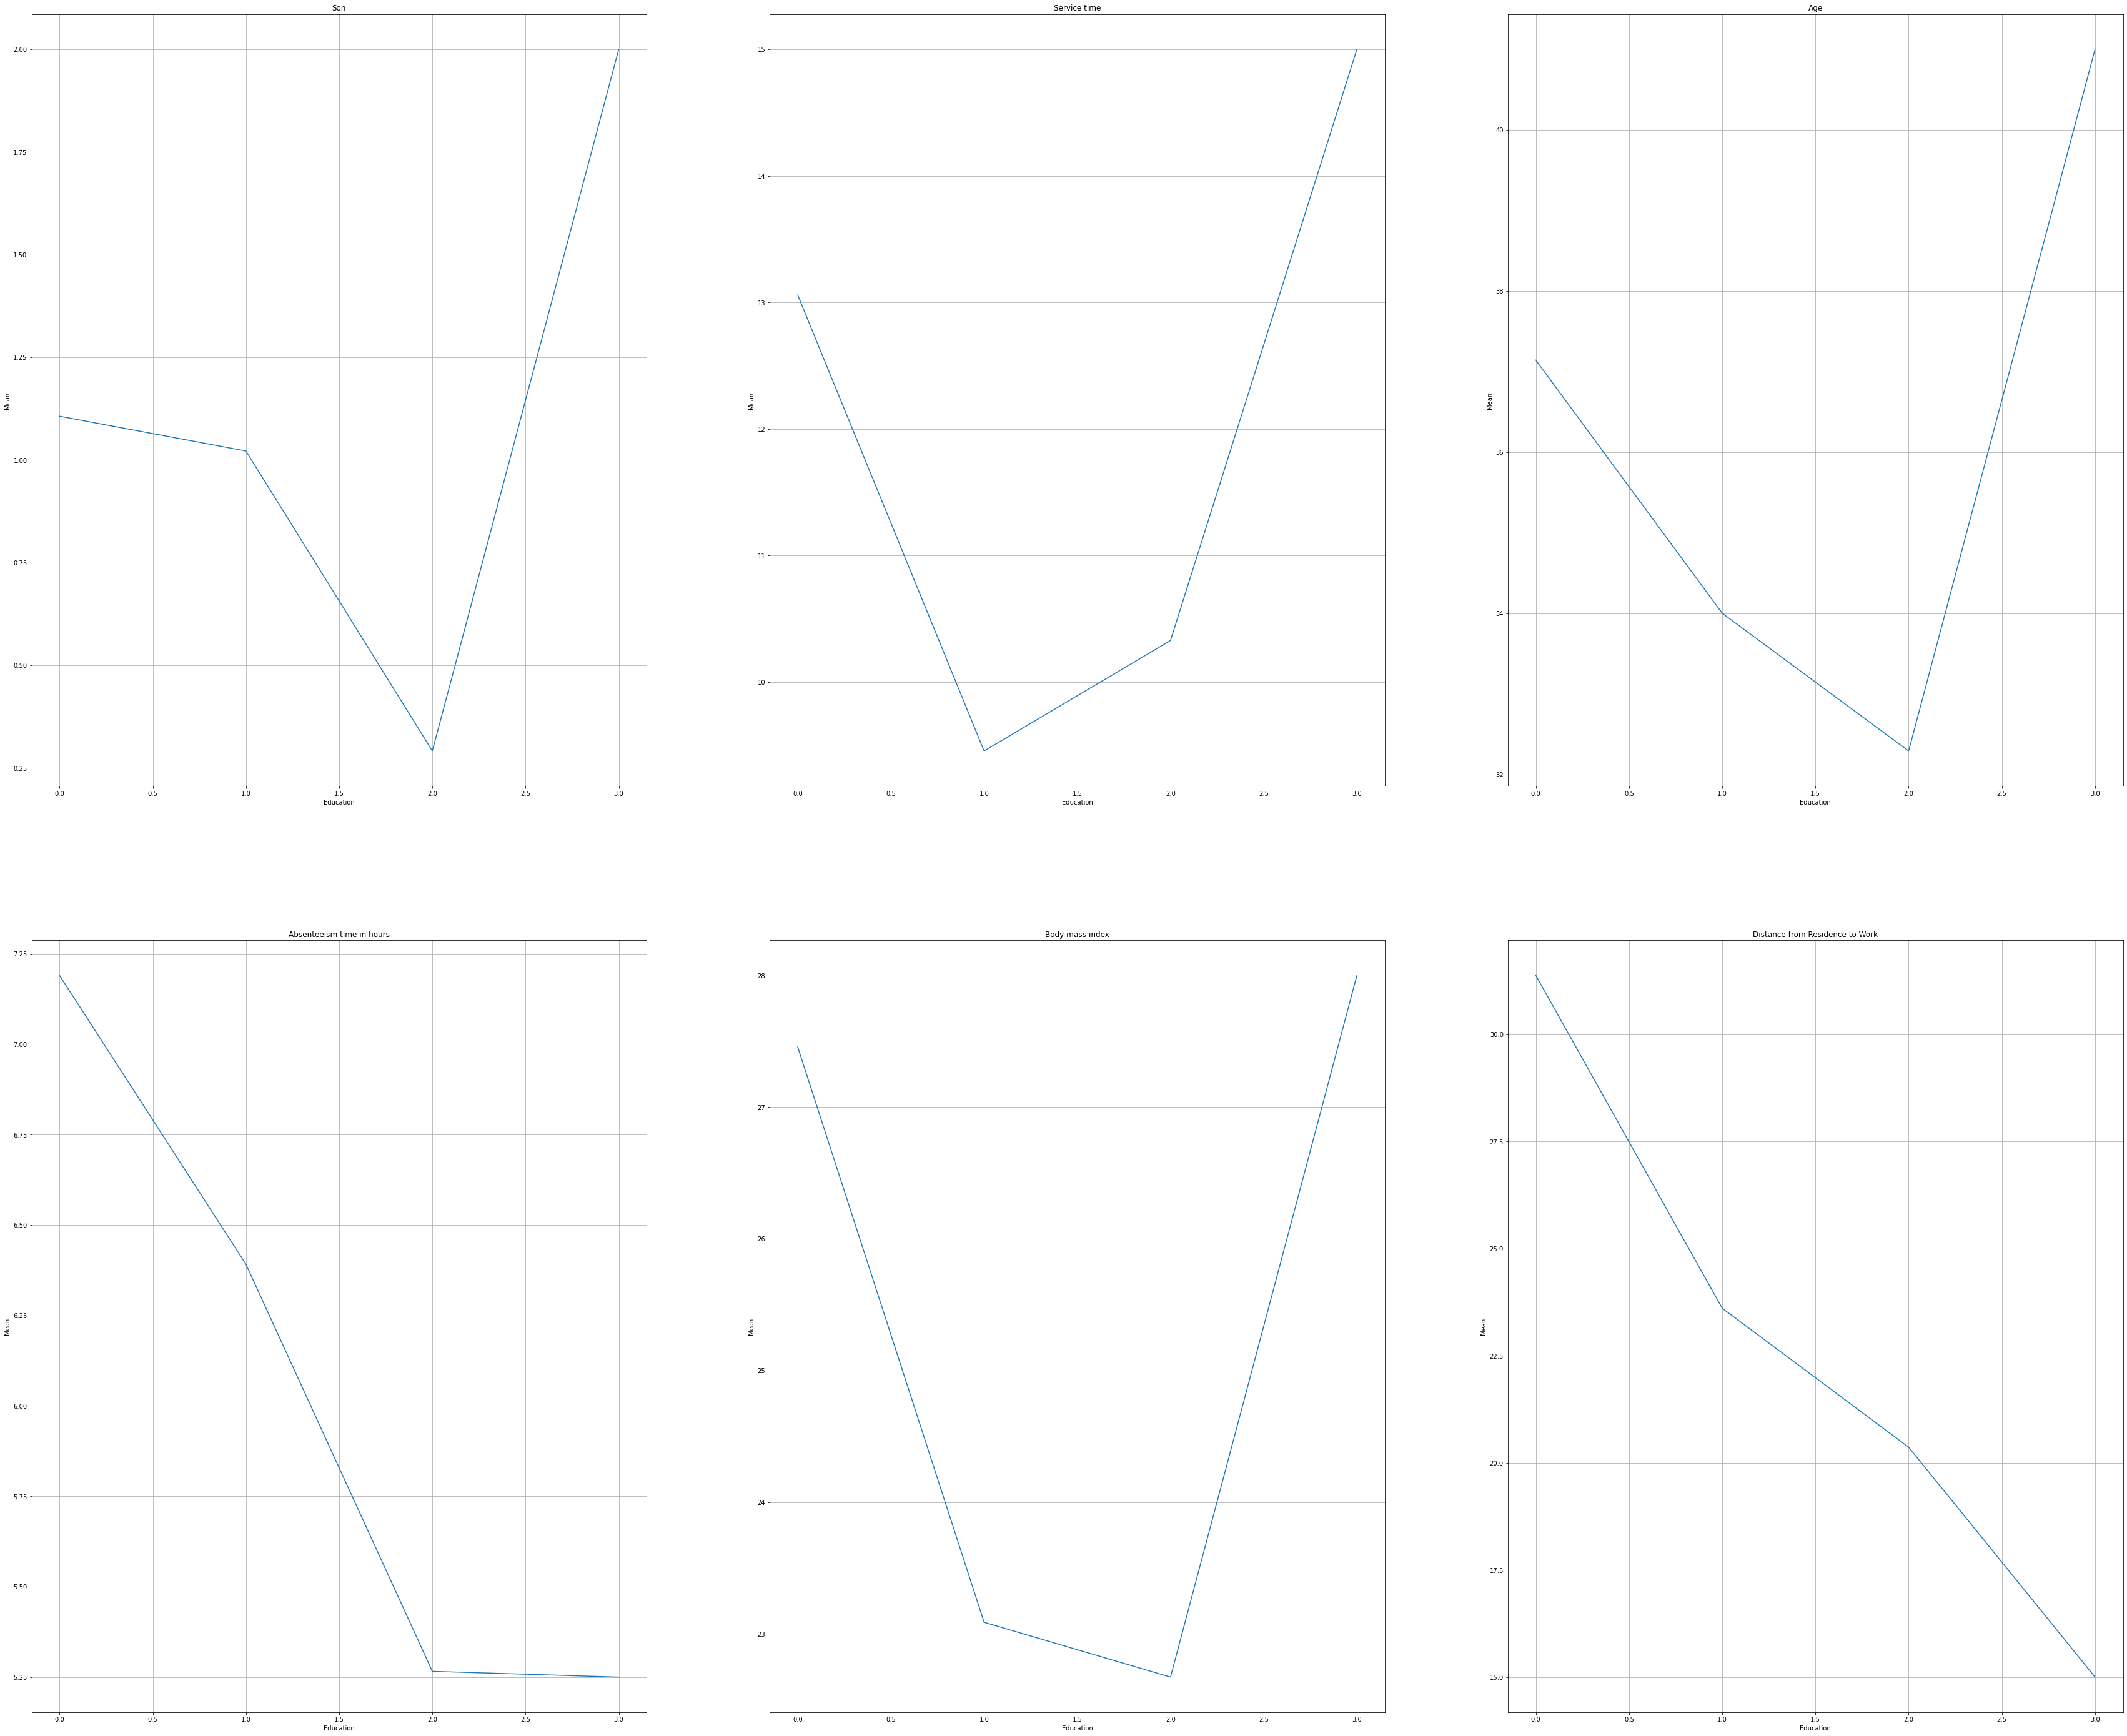

In [31]:
cond_data_hs = data[data.Education == 1]
cond_data_grad = data[data.Education == 2]
cond_data_postgrad = data[data.Education == 3]
cond_data_master = data[data.Education == 4]
selected_features = ['Son', 'Service time', 'Age', 'Absenteeism time in hours', 'Body mass index', 'Distance from Residence to Work']

all_mean = []
all_mean.append(cond_data_hs.mean())
all_mean.append(cond_data_grad.mean())
all_mean.append(cond_data_postgrad.mean())
all_mean.append(cond_data_master.mean())

fig, ax = plt.subplots(2, 3, figsize=(60, 50))
for i, feature in enumerate(selected_features):
    ax[i // 3, i % 3].plot([x for x in range(4)], [mean[feature] for mean in all_mean])
    ax[i // 3, i % 3].set_title(feature)
    ax[i // 3, i % 3].set_xlabel('Education')
    ax[i // 3, i % 3].set_ylabel('Mean')
    ax[i // 3, i % 3].grid()


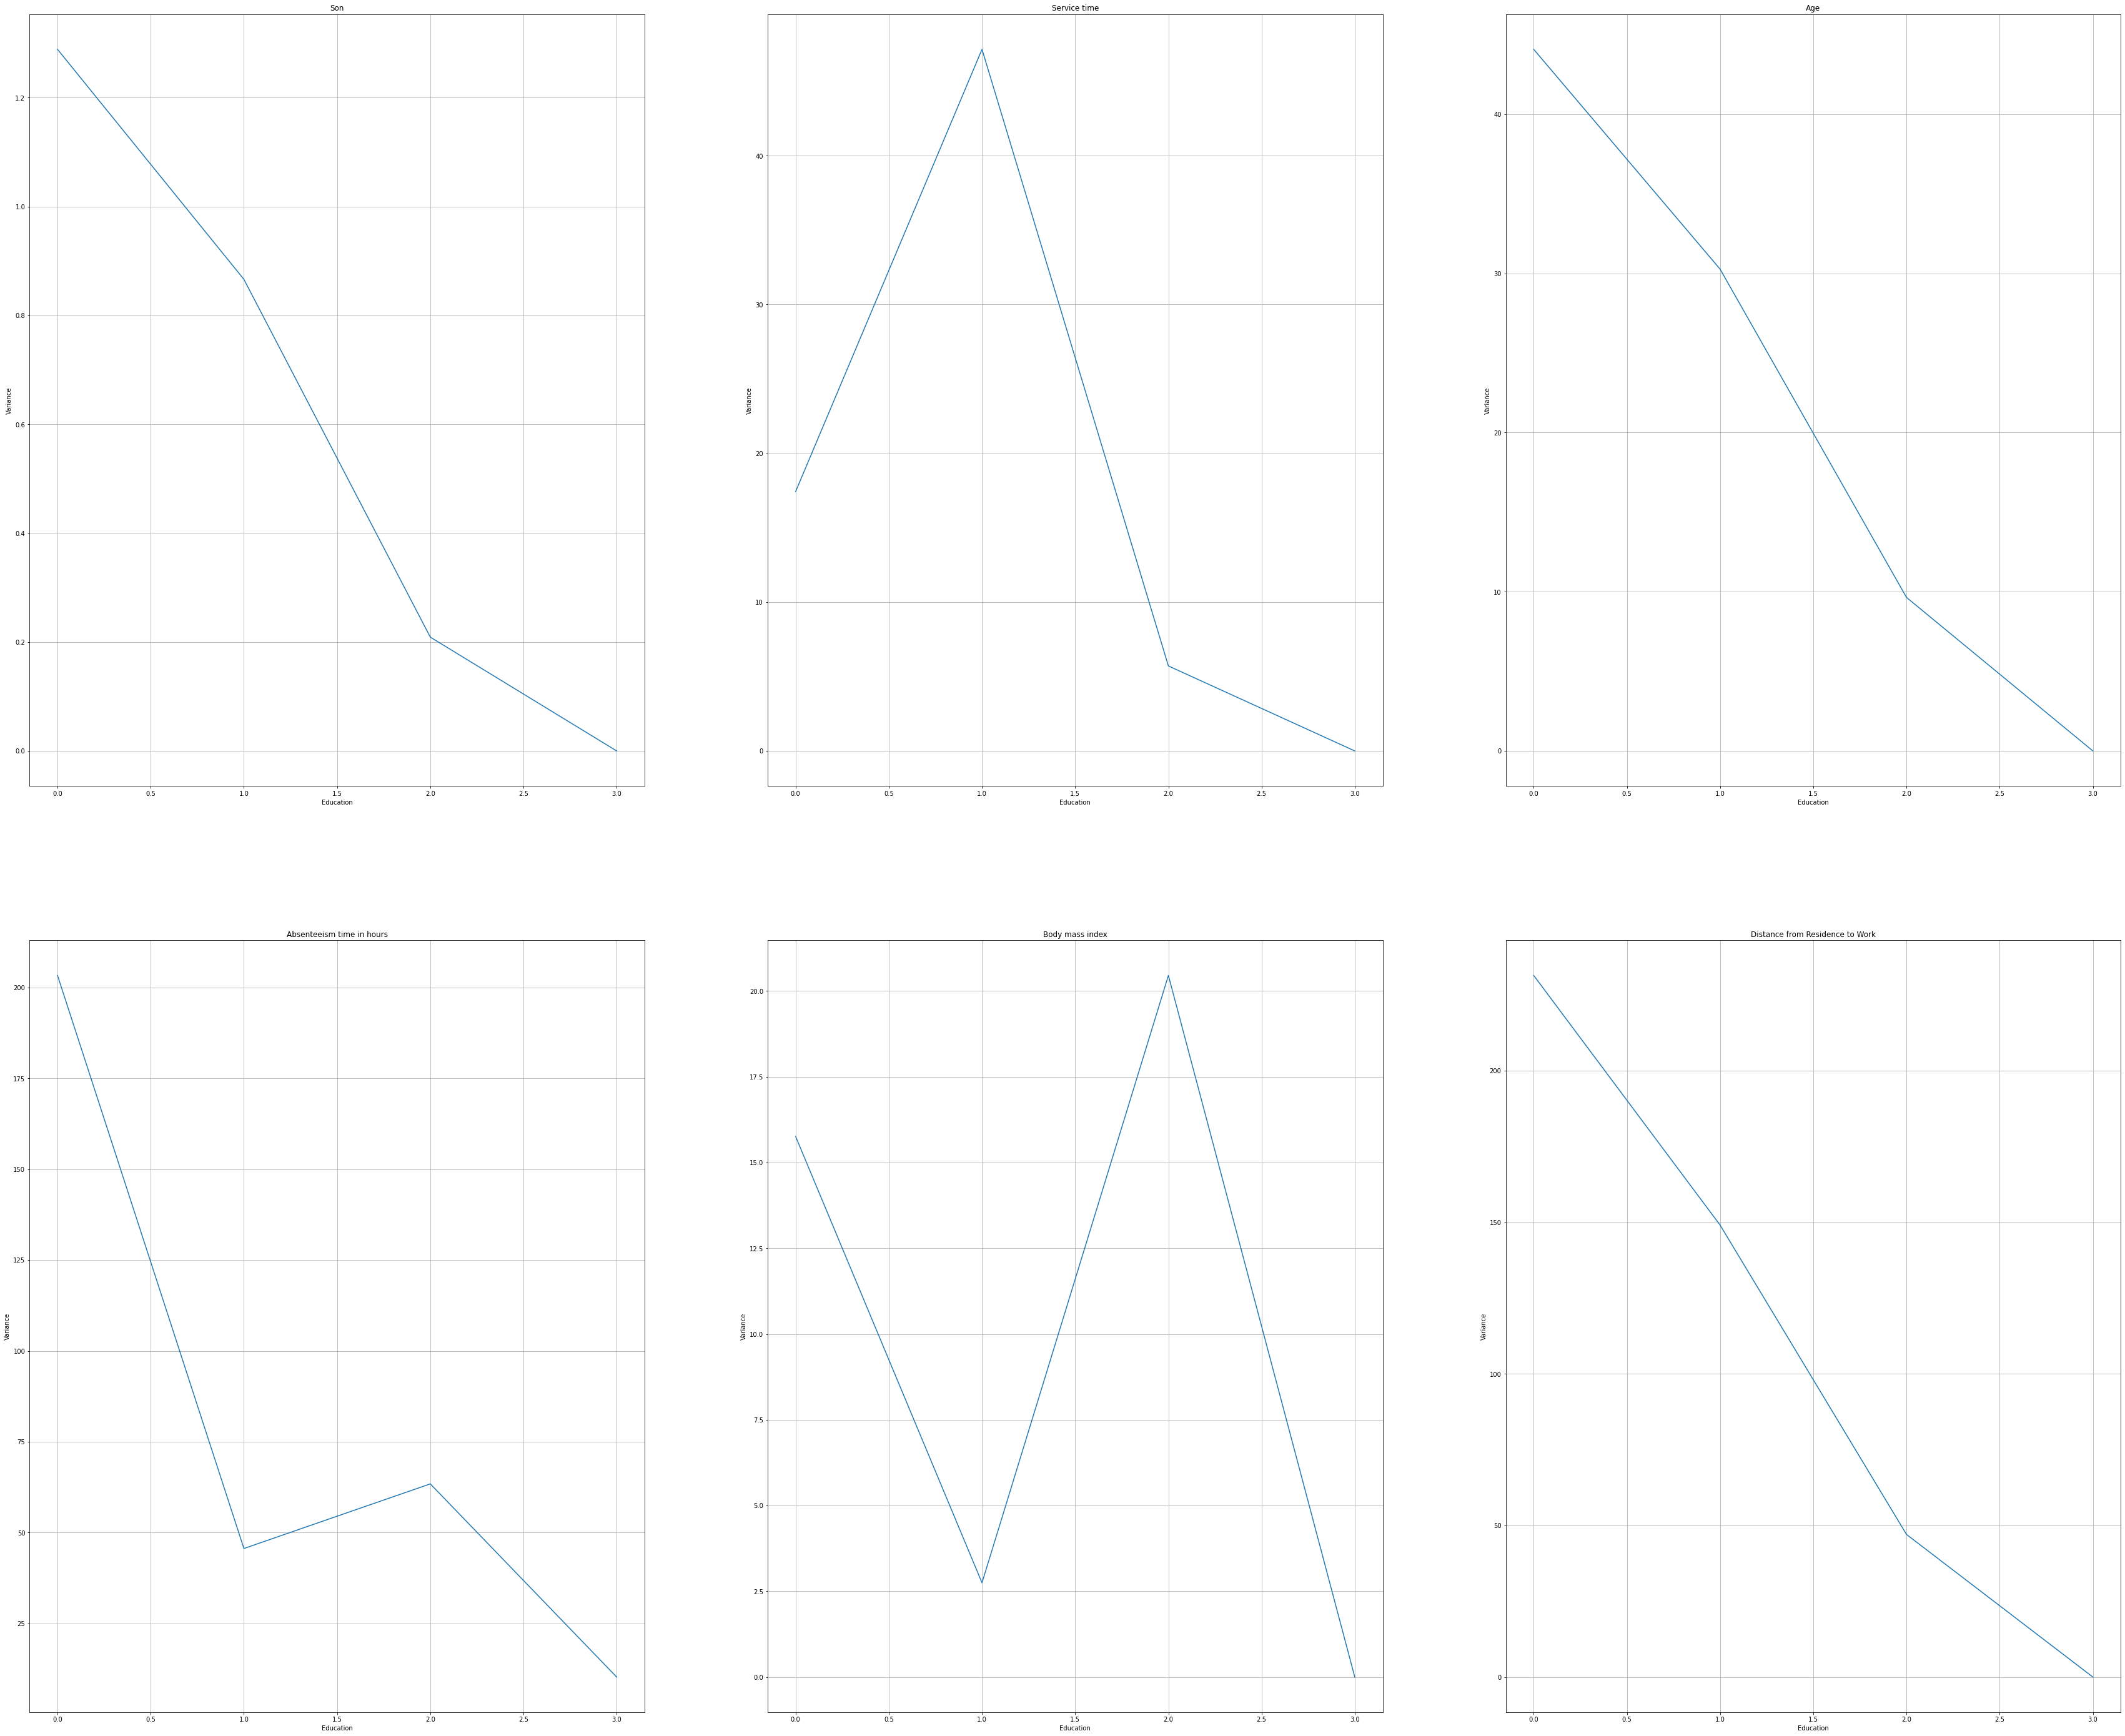

In [30]:
all_var = []
all_var.append(cond_data_hs.var())
all_var.append(cond_data_grad.var())
all_var.append(cond_data_postgrad.var())
all_var.append(cond_data_master.var())

fig, ax = plt.subplots(2, 3, figsize=(60, 50))
for i, feature in enumerate(selected_features):
    ax[i // 3, i % 3].plot([x for x in range(4)], [var[feature] for var in all_var])
    ax[i // 3, i % 3].set_title(feature)
    ax[i // 3, i % 3].set_xlabel('Education')
    ax[i // 3, i % 3].set_ylabel('Variance')
    ax[i // 3, i % 3].grid()

In [24]:
import scipy.stats as stats

corr = stats.pearsonr(data["Service time"], data.Age)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 5.918146155438404e-98
cor:		 0.670978916918052


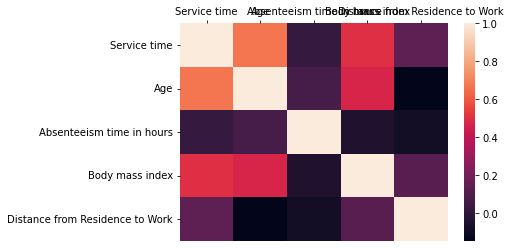

In [48]:
import seaborn as sb

corrmat = data.corr()
sb.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [42]:
import statsmodels.api as sm

mod = sm.OLS(Y_train, X_train.astype(float))
res = mod.fit()
print (res.conf_int(0.01))

                                        0         1
Seasons                         -1.434789  1.098192
Son                             -0.002715  2.684032
Education                       -1.756446  2.231441
Reason for absence              -0.335812  0.002390
Service time                    -0.639305  0.264645
Age                              0.055572  0.639574
Body mass index                 -0.430142  0.273704
Distance from Residence to Work -0.085195  0.115346


Step 5. Choose a task formulation for regression. Estimate multivariate correlation (target -
predictors).

Target variable is "Absenteeism time in hours", other variables are predictors. The regression task: how much such factors as season, having a child, education, reason for absence, service time, age, body mass index, distance from residence to work affect the absenteeism time in hours.

Step 6. Build regression model and make an analysis of multicollinearity and regularization (if
needed).

Step 7. Analyze the quality of regression model (distribution of residuals, determination
coefficient).

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import isinf

def mean_absolute_percentage_error(y_true, y_pred):
    temp = []
    x = np.abs((y_true - y_pred) / y_true)
    for val in x:
        if not isinf(val):
            temp.append(val)
    return np.mean(temp) * 100

reg = LinearRegression(normalize=True)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
Y_pred_all = np.array(reg.predict(X))

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute error =  6.281354177909746
Mean squared error =  206.62429053472698
Mean absolute percentage error =  144.2533127914488


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [22]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLarsIC

clf = Lasso(alpha=0.1)
clf.fit(X_train, Y_train)
print("Lasso coefs: ", clf.coef_)

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, Y_train)
alpha_aic_ = model_aic.coef_
print("LassoLarsIC coefs: ", alpha_aic_)
print(X_train.columns)

y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(Y_test, y_pred_lasso)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(np.asarray(Y_test), y_pred_lasso)
mae_lasso_aic = mean_absolute_error(Y_test, y_pred_lasso_aic)
mse_lasso_aic = mean_squared_error(Y_test, y_pred_lasso_aic)
mape_lasso_aic = mean_absolute_percentage_error(Y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute percentage error with lasso', mape_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)
print('Mean squared error with aic lasso = ', mse_lasso_aic)
print('Mean absolute percentage error with aic lasso', mape_lasso_aic)

Lasso coefs:  [-0.56071875  0.92769883 -1.5144843  -0.23297687  0.03466824  0.11991478
 -0.38459579 -0.03628822]
LassoLarsIC coefs:  [-0.53391566  0.92453674 -1.50377098 -0.22281378  0.          0.11186038
 -0.34282368 -0.03053885]
Index(['Seasons', 'Son', 'Education', 'Reason for absence', 'Service time',
       'Age', 'Body mass index', 'Distance from Residence to Work'],
      dtype='object')
Mean absolute error with lasso =  6.236699922737178
Mean squared error with lasso =  206.2833984641666
Mean absolute percentage error with lasso 143.89954724607173
Mean absolute error with aic lasso =  6.183497976904775
Mean squared error with aic lasso =  206.52658888657666
Mean absolute percentage error with aic lasso 143.12910790954


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/var/folders/w9/ttrb46c574b570c_y92y38900000gp/T/ipykernel_7573/1704311986.py:8: RuntimeWarning: divide by zero encountered in true_divide
  x = np.abs((y_true - y_pred) / y_true)


Text(0, 0.5, 'Absenteeism time')

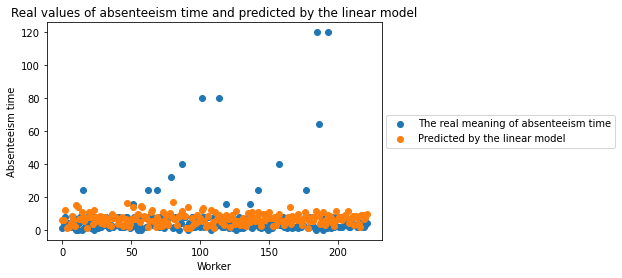

In [45]:
x = [i for i in range(len(Y_test))]

plt.scatter(x, Y_test, label = u'The real meaning of absenteeism time')
plt.scatter(x, Y_pred, label = u'Predicted by the linear model')
plt.title(u'Real values of absenteeism time and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Worker')
plt.ylabel(u'Absenteeism time')

Text(0, 0.5, 'Absenteeism time')

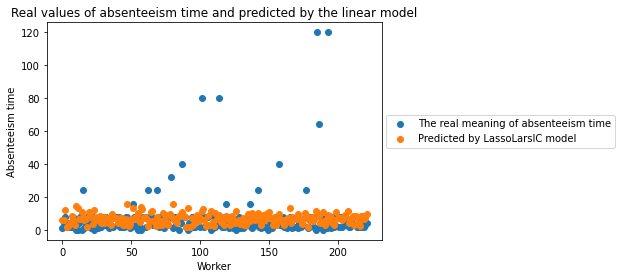

In [46]:
plt.scatter(x, Y_test, label = u'The real meaning of absenteeism time')
plt.scatter(x, y_pred_lasso_aic, label=u'Predicted by LassoLarsIC model')
plt.title(u'Real values of absenteeism time and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Worker')
plt.ylabel(u'Absenteeism time')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.49749690294265747, pvalue=2.534388402577864e-41)

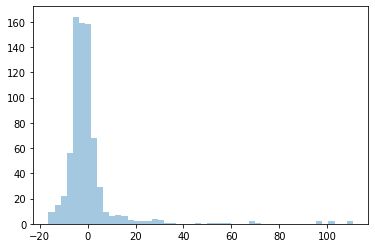

In [25]:
import seaborn as sns

y_diff = np.asarray(Y) - np.asarray(Y_pred_all)
sns.distplot(y_diff, kde=False)
stats.shapiro(y_diff)